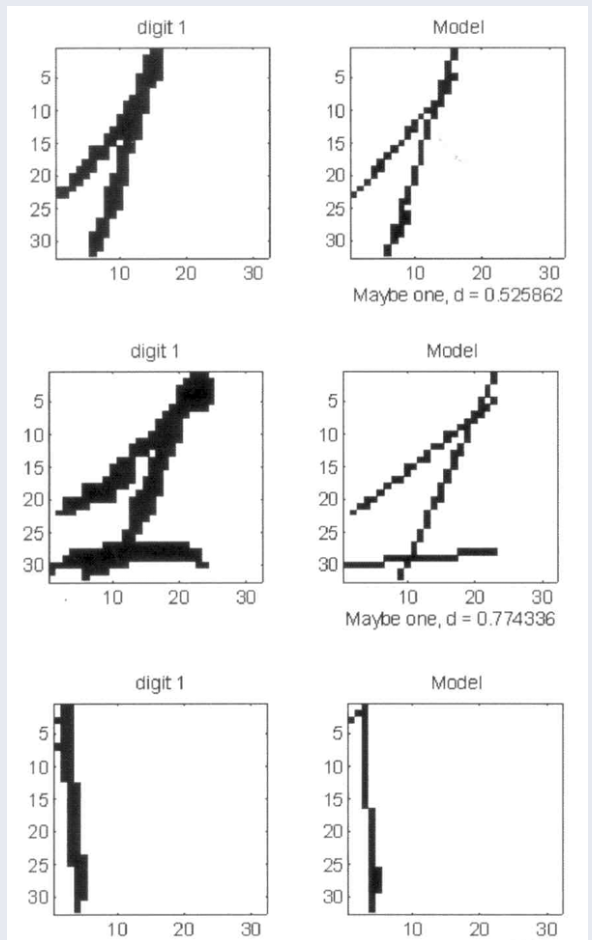

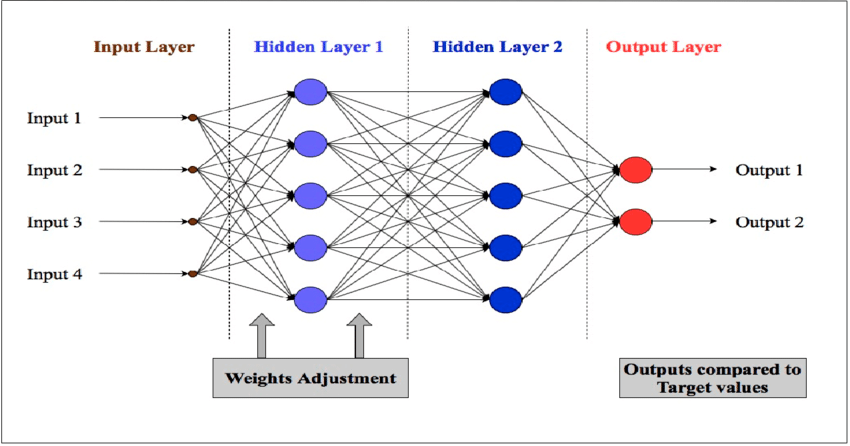

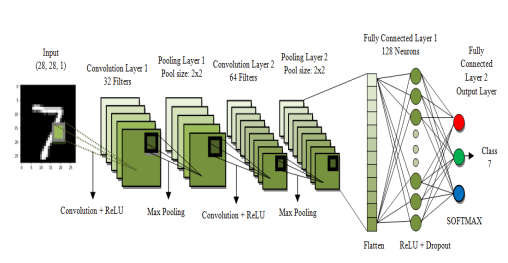

In [3]:
from tensorflow.keras.datasets import mnist

In [21]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
y_test.shape

(10000,)

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
x_train[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [17]:
x_train.reshape(x_train.shape[0], 28, 28, 1)[0][0]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=uint8)

In [22]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [23]:
x_train.shape

(60000, 28, 28, 1)

In [32]:
from tensorflow import keras
from tensorflow.keras import layers

In [28]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [30]:
input_shape = (28, 28, 1)

In [34]:
num_classes = 10

In [35]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [36]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 32s 73ms/step - loss: 1.1314 - accuracy: 0.8483 - val_loss: 0.0926 - val_accuracy: 0.9725
Epoch 2/15
422/422 [==============================] - 31s 72ms/step - loss: 0.1698 - accuracy: 0.9478 - val_loss: 0.0614 - val_accuracy: 0.9808
Epoch 3/15
422/422 [==============================] - 31s 74ms/step - loss: 0.1304 - accuracy: 0.9594 - val_loss: 0.0557 - val_accuracy: 0.9827
Epoch 4/15
422/422 [==============================] - 31s 73ms/step - loss: 0.1064 - accuracy: 0.9674 - val_loss: 0.0484 - val_accuracy: 0.9865
Epoch 5/15
422/422 [==============================] - 31s 73ms/step - loss: 0.0933 - accuracy: 0.9714 - val_loss: 0.0471 - val_accuracy: 0.9855
Epoch 6/15
422/422 [==============================] - 28s 66ms/step - loss: 0.0842 - accuracy: 0.9736 - val_loss: 0.0405 - val_accuracy: 0.9885
Epoch 7/15
422/422 [==============================] - 28s 67ms/step - loss: 0.0783 - accuracy: 0.9756 - val_loss: 0.0398 - val_accuracy:

In [41]:
score = model.evaluate(x_test, y_test, verbose=True)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.0393 - accuracy: 0.9870
Test loss: 0.03929774463176727
Test accuracy: 0.9869999885559082


In [39]:
score = model.evaluate(x_train, y_train, verbose=True)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

1875/1875 [==============================] - 11s 6ms/step - loss: 0.0200 - accuracy: 0.9937
Test loss: 0.020001675933599472
Test accuracy: 0.9936666488647461
